In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  y = 1.447x + 0,089, + gaussian distribution

data = []

for i in range(100):
    x = np.random.normal(-10., 10.)
    eps = np.random.normal(0, 0.01)
    y = 1.447 * x + 0.089 + eps
    data.append([x, y])

data = np.array(data)
data.shape

(100, 2)

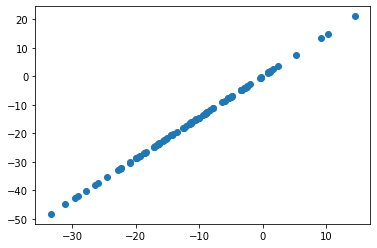

In [3]:
plt.scatter(data[:, 0], data[:, 1])

In [4]:
# MSE

def mse(w, b, points):
    error = 0
    for i in range(len(points)):
        x = data[1, 0]
        y = data[i, 1]
        error += (y - (w * x + b)) ** 2
    return error / len(points)

MSE = mse(1.447, 0.089, data)
MSE

452.0470563801415

# calculate Gradient  
## dl/dw = 2/n * (sum(y-(wx+b)))*x , dl/db = 2/n*(sum(y-(wx+b)))
## w = w - eta * dl/dw , 
## b = b - eta * dl/db        
## where eta is learning rate
# L is aor error like MSE o MAE for mse: L = 1/n(sum((y-(wb+x))**2))

# x = x - eta * dy/dx

In [5]:
def step_gradient(points, w_current, b_current, eta=0.001):
    # calculate gradient and update w and b
    w_gradient = 0
    b_gradient = 0
    
    n = len(points)
    for i in range(n):
        x = points[i, 0]
        y = points[i, 1]
        
        w_gradient += 2/n * ((w_current * x + b_current) - y) * x
        b_gradient += 2/n * ((w_current * x + b_current) - y)
    
    w_new = w_current - eta * w_gradient 
    b_new = b_current - eta * b_gradient
        
    return (w_new, b_new)

def gradien_decending(points, w_starting, b_starting, iteration, eta=0.01):
    w = w_starting
    b = b_starting
    
    for step in range(iteration):
        w, b = step_gradient(np.array(points), w, b)
        loss = mse(w, b, points)
        if step % 50 == 0:
            print(f'iteration: {step}, loss: {loss}')
    return [w, b]

In [13]:
# creat function which make 100 points and calc above item

def main(points):
    
    initial_b = 0
    initial_w = 0
    iterations_num = 1000
    # train 1000 item and return x, b
    w, b = gradien_decending(points, initial_w, initial_b, iterations_num)
    
    loss = mse(w, b, data)
    return w, b

main(data)

iteration: 0, loss: 179.09713128944506
iteration: 50, loss: 450.7981903251004
iteration: 100, loss: 450.8452349466055
iteration: 150, loss: 450.8904566574423
iteration: 200, loss: 450.933925953272
iteration: 250, loss: 450.9757106132272
iteration: 300, loss: 451.0158758048143
iteration: 350, loss: 451.05448418378415
iteration: 400, loss: 451.09159599024474
iteration: 450, loss: 451.1272691411482
iteration: 500, loss: 451.1615593192866
iteration: 550, loss: 451.194520058925
iteration: 600, loss: 451.22620282819344
iteration: 650, loss: 451.2566571083568
iteration: 700, loss: 451.2859304700858
iteration: 750, loss: 451.31406864682276
iteration: 800, loss: 451.34111560537326
iteration: 850, loss: 451.3671136138027
iteration: 900, loss: 451.3921033067564
iteration: 950, loss: 451.41612374829106


(1.4429073341468028, 0.014122498494522486)

iteration: 0, loss: 179.09713128944506
iteration: 50, loss: 450.7981903251004
iteration: 100, loss: 450.8452349466055
iteration: 150, loss: 450.8904566574423
iteration: 200, loss: 450.933925953272
iteration: 250, loss: 450.9757106132272
iteration: 300, loss: 451.0158758048143
iteration: 350, loss: 451.05448418378415
iteration: 400, loss: 451.09159599024474
iteration: 450, loss: 451.1272691411482
iteration: 500, loss: 451.1615593192866
iteration: 550, loss: 451.194520058925
iteration: 600, loss: 451.22620282819344
iteration: 650, loss: 451.2566571083568
iteration: 700, loss: 451.2859304700858
iteration: 750, loss: 451.31406864682276
iteration: 800, loss: 451.34111560537326
iteration: 850, loss: 451.3671136138027
iteration: 900, loss: 451.3921033067564
iteration: 950, loss: 451.41612374829106


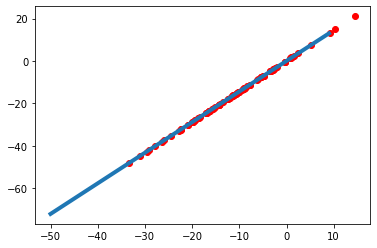

In [21]:

w, b = main(data)
x = range(-50, 10, 1)
y = w * x + b
plt.plot(x, y, linewidth=4)
plt.scatter(data[:,0], data[:,1], c='r')